In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from zipfile import ZipFile


In [3]:
from google.colab import files
uploaded = files.upload()


with ZipFile("animal_dataset.zip", 'r') as z:
    z.extractall("animal_dataset")

Saving animal_dataset.zip to animal_dataset.zip


In [6]:
dataset_path = "animal_dataset/animal_dataset"

def load_dataset(path):
    X = []
    y = []
    class_names = sorted(os.listdir(path))

    for label_idx, cls in enumerate(class_names):
        cls_path = os.path.join(path, cls)

        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)

            img = cv2.imread(img_path)
            img = cv2.resize(img, (32, 32))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img / 255.0
            X.append(img.flatten())
            y.append(label_idx)

    return np.array(X), np.array(y), class_names

X, y, class_names = load_dataset(dataset_path)
print("Dataset loaded:", X.shape, "Labels:", y.shape)
print("Classes:", class_names)


Dataset loaded: (300, 1024) Labels: (300,)
Classes: ['cat', 'dog', 'panda']


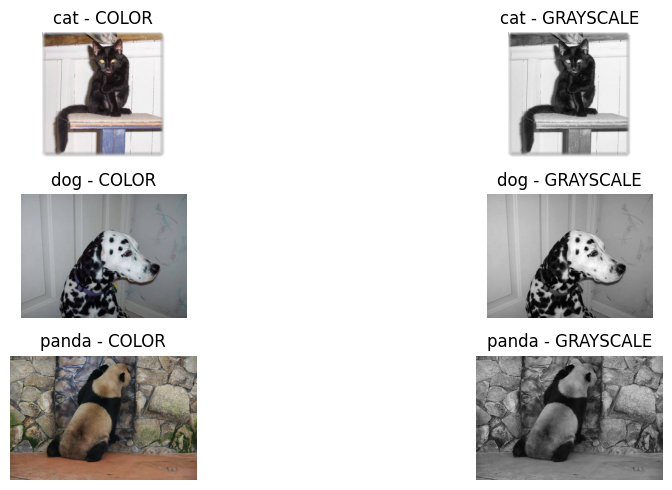

In [18]:
classes = sorted(os.listdir(dataset_path))

plt.figure(figsize=(12, 5))

plot_index = 1

for cls in classes:
    cls_path = os.path.join(dataset_path, cls)
    img_name = os.listdir(cls_path)[0]
    img_path = os.path.join(cls_path, img_name)


    img_color = cv2.imread(img_path)
    img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)


    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)


    plt.subplot(len(classes), 2, plot_index)
    plt.imshow(img_color)
    plt.title(f"{cls} - COLOR")
    plt.axis("off")
    plot_index += 1


    plt.subplot(len(classes), 2, plot_index)
    plt.imshow(img_gray, cmap="gray")
    plt.title(f"{cls} - GRAYSCALE")
    plt.axis("off")
    plot_index += 1

plt.tight_layout()
plt.show()



In [7]:
##Implement L1 and L2 Distance Functions

In [19]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [20]:
#Implement k-NN
def knn_predict(x_test, X_train, y_train, k, distance_type="L2"):

    distances = []

    for i in range(len(X_train)):
        if distance_type == "L1":
            dist = manhattan_distance(x_test, X_train[i])
        else:
            dist = euclidean_distance(x_test, X_train[i])

        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]


    labels = [label for _, label in k_nearest]
    prediction = max(set(labels), key=labels.count)

    return prediction


In [21]:
#5-Fold Cross-Validation
def cross_validation(X, y, k_values, distance_type="L2"):
    fold_size = len(X) // 5
    accuracies = {k: [] for k in k_values}

    for fold in range(5):
        start = fold * fold_size
        end = start + fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])

        for k in k_values:
            correct = 0

            for i in range(len(X_test)):
                pred = knn_predict(X_test[i], X_train, y_train, k, distance_type)
                if pred == y_test[i]:
                    correct += 1

            accuracy = correct / len(X_test)
            accuracies[k].append(accuracy)
            print(f"Fold {fold+1}, K={k}, Dist={distance_type}, Acc={accuracy:.4f}")


    avg_acc = {k: np.mean(v) for k, v in accuracies.items()}
    return avg_acc


In [22]:
k_values = [1, 3, 5, 7, 9]

acc_L1 = cross_validation(X, y, k_values, distance_type="L1")
acc_L2 = cross_validation(X, y, k_values, distance_type="L2")

print("L1 Results:", acc_L1)
print("L2 Results:", acc_L2)


Fold 1, K=1, Dist=L1, Acc=0.2333
Fold 1, K=3, Dist=L1, Acc=0.3000
Fold 1, K=5, Dist=L1, Acc=0.2000
Fold 1, K=7, Dist=L1, Acc=0.1167
Fold 1, K=9, Dist=L1, Acc=0.0500
Fold 2, K=1, Dist=L1, Acc=0.3667
Fold 2, K=3, Dist=L1, Acc=0.4667
Fold 2, K=5, Dist=L1, Acc=0.5167
Fold 2, K=7, Dist=L1, Acc=0.4167
Fold 2, K=9, Dist=L1, Acc=0.5167
Fold 3, K=1, Dist=L1, Acc=0.2833
Fold 3, K=3, Dist=L1, Acc=0.2500
Fold 3, K=5, Dist=L1, Acc=0.2333
Fold 3, K=7, Dist=L1, Acc=0.2333
Fold 3, K=9, Dist=L1, Acc=0.2667
Fold 4, K=1, Dist=L1, Acc=0.3833
Fold 4, K=3, Dist=L1, Acc=0.2000
Fold 4, K=5, Dist=L1, Acc=0.2333
Fold 4, K=7, Dist=L1, Acc=0.2167
Fold 4, K=9, Dist=L1, Acc=0.2167
Fold 5, K=1, Dist=L1, Acc=0.1000
Fold 5, K=3, Dist=L1, Acc=0.0500
Fold 5, K=5, Dist=L1, Acc=0.0167
Fold 5, K=7, Dist=L1, Acc=0.0333
Fold 5, K=9, Dist=L1, Acc=0.0167
Fold 1, K=1, Dist=L2, Acc=0.2667
Fold 1, K=3, Dist=L2, Acc=0.2333
Fold 1, K=5, Dist=L2, Acc=0.1500
Fold 1, K=7, Dist=L2, Acc=0.1000
Fold 1, K=9, Dist=L2, Acc=0.0167
Fold 2, K=

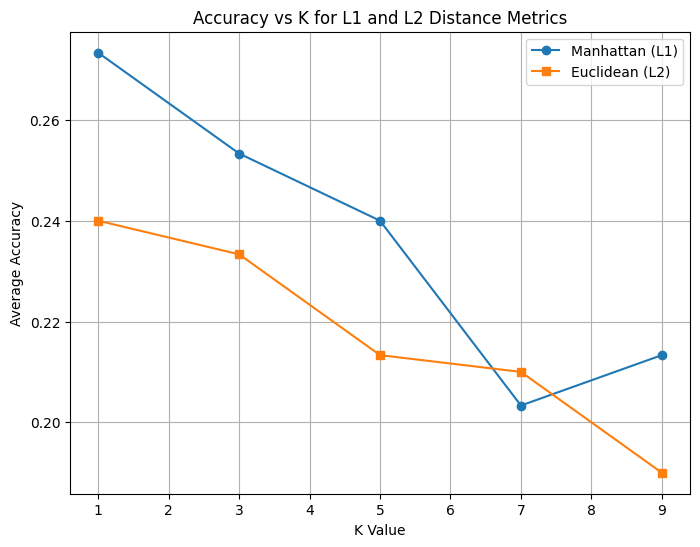

In [23]:
plt.figure(figsize=(8,6))
plt.plot(k_values, [acc_L1[k] for k in k_values], marker='o', label="Manhattan (L1)")
plt.plot(k_values, [acc_L2[k] for k in k_values], marker='s', label="Euclidean (L2)")
plt.xlabel("K Value")
plt.ylabel("Average Accuracy")
plt.title("Accuracy vs K for L1 and L2 Distance Metrics")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
def knn_top5(x_test, X_train, y_train, k, distance_type="L2"):
    distances = []

    for i in range(len(X_train)):
        if distance_type == "L1":
            dist = manhattan_distance(x_test, X_train[i])
        else:
            dist = euclidean_distance(x_test, X_train[i])

        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])

    top5 = distances[:5]
    return top5

for idx in range(5):
    top5 = knn_top5(X[idx], X, y, k=3, distance_type="L1")
    print(f"\nTest Image {idx+1}")
    for dist, label in top5:
        print(f"Class: {class_names[label]}, Distance: {dist:.4f}")



Test Image 1
Class: cat, Distance: 0.0000
Class: cat, Distance: 247.5882
Class: cat, Distance: 255.3020
Class: dog, Distance: 257.6078
Class: panda, Distance: 263.2000

Test Image 2
Class: cat, Distance: 0.0000
Class: dog, Distance: 168.7451
Class: cat, Distance: 168.9647
Class: cat, Distance: 189.5216
Class: cat, Distance: 198.7608

Test Image 3
Class: cat, Distance: 0.0000
Class: cat, Distance: 142.6588
Class: dog, Distance: 143.2549
Class: cat, Distance: 149.4941
Class: dog, Distance: 156.3412

Test Image 4
Class: cat, Distance: 0.0000
Class: dog, Distance: 163.4627
Class: dog, Distance: 172.9176
Class: dog, Distance: 176.6392
Class: cat, Distance: 177.3490

Test Image 5
Class: cat, Distance: 0.0000
Class: cat, Distance: 164.9294
Class: dog, Distance: 177.5804
Class: cat, Distance: 180.7647
Class: cat, Distance: 183.5843
